In [ ]:
# tinyurl.com/sitip19-rait-ml-datasets
# tinyurl.com/sitip19-rait-ml-lab01

# Pandas Lab Assignment - Diamonds

The following csv data file contains data of diamonds with following characteristics.

carat - diamond's apparent size <br>
cut - how good the diamond shaping is <br>
color - colour of a diamond as letter representation <br>
clarity - clarity of diamond <br>
depth - depth of diamond <br>
table - top surface of diamond <br>
price - price of diamond <br>
x - x dimension <br>
y - y dimension<br>
z - z dimension <br>

Read the file and find the following:

1. Drop the unnamed column from the dataset once you read it  
2. The occurences of all unique colors of diamonds, bar chart of the same.     
3. Average price of each cut of diamond.  
4. Find the volume of every diamond and store it in a new column in the dataset. (volume = x*y*z)   
5. Histograms of Price and depths colums as two separate plots  
6. A scatter plot of carat vs Price, volume vs Price, depth vs Price in a subplot of 1x3.  
7. Convert the categorical values of color, to numbers. i.e D, E, F, H, I, J to 0, 1, 2, 3, 4, 5 using Pandas methods only  
8. Which clarity(i.e the category) diamond has maximum mean depth?  
9. Find the diamond(i.e row) with minimum price per volume

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("diamonds.csv")#comma separated values
df.head()

FileNotFoundError: File b'diamonds.csv' does not exist

In [54]:
#Q1
df1=df.drop(['Unnamed: 0'],axis=1)
df1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64


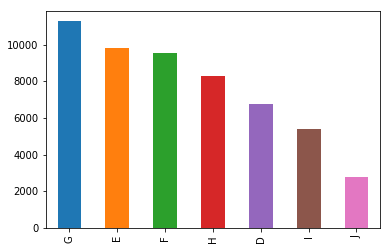

In [55]:
#Q2
import matplotlib.pyplot as plt
df1['color'].unique()
df1['color'].value_counts()
datacolor=df1['color'].value_counts()
print(datacolor)
datacolor.plot(kind='bar')

In [57]:
#Q3
# df1['cut'].unique()
# mapping={'Ideal':0,'Premium':1,'Good':2,'Very Good':3,'Fair':4}
# df['Quality']=df['cut'].apply(lambda x:mapping[x])
# df.head()


#sirs
datapricecut=df1[['cut','price']]
for name,value in datapricecut.groupby(['cut']):
    print("Average Price of {0} is:{1}".format(name,value['price'].mean()))

Average Price of Fair is:4358.757763975155
Average Price of Good is:3928.864451691806
Average Price of Ideal is:3457.541970210199
Average Price of Premium is:4584.2577042999055
Average Price of Very Good is:3981.7598907465654


In [59]:
#Q4
df1["Volume"]=df1['x']*df1['y']*df1['z']
df1.head()


,carat,cut,color,clarity,depth,table,price,x,y,z,Volume
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250


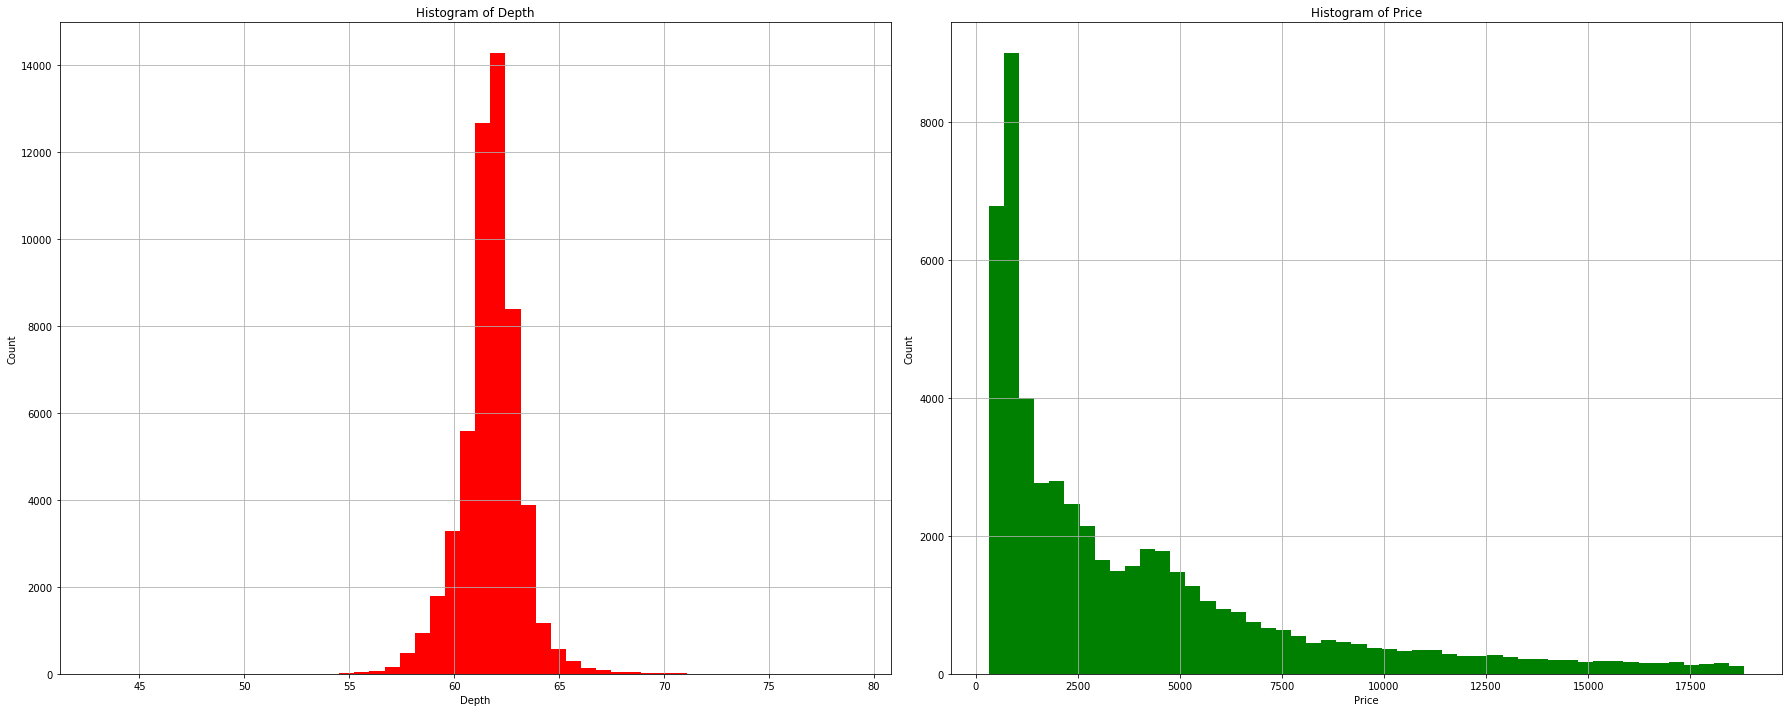

In [75]:
#Q5
plt.figure(figsize=[25,10])
plt.subplot(1,2,1)
plt.hist(df1['depth'], bins=50,color='r',cumulative=False)
plt.xlabel('Depth')
plt.ylabel('Count')
plt.title("Histogram of Depth")
plt.grid()

plt.subplot(1,2,2)
plt.hist(df1['price'], bins=50,color='g',cumulative=False)
plt.xlabel('Price')
plt.ylabel('Count')
plt.title("Histogram of Price")
plt.grid()

plt.tight_layout()

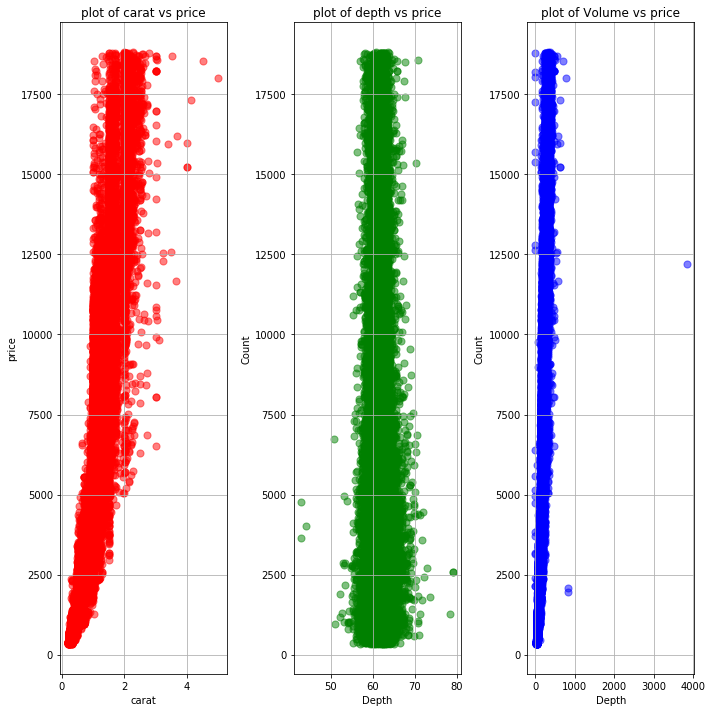

In [99]:
#Q6
plt.figure(figsize=[10,10])
plt.subplot(1,3,1)
plt.scatter(df1['carat'],df1['price'],color='r',label='Red',marker='.',s=200,alpha=0.5)
plt.xlabel('carat')
plt.ylabel('price')
plt.title("plot of carat vs price")
plt.grid()

plt.subplot(1,3,2)
plt.scatter(df1['depth'],df1['price'],color='g',label='Green',marker='.',s=200,alpha=0.5)
plt.xlabel('Depth')
plt.ylabel('Count')
plt.title("plot of depth vs price")
plt.grid()

plt.subplot(1,3,3)
plt.scatter(df1['Volume'],df1['price'],color='b',label='Red',marker='.',s=200,alpha=0.5)
plt.xlabel('Depth')
plt.ylabel('Count')
plt.title("plot of Volume vs price")
plt.grid()

plt.tight_layout()

In [109]:
#Q7
df1.head()
df1['color'].unique()
mapping={'D':0,'E':1,'F':2,'G':3,'H':4,'I':5,'J':6}
df1['newcolor']=df['color'].apply(lambda x:mapping[x])
df1.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,Volume,newcolor
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,38.202030,1
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,34.505856,1
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,38.076885,1
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,46.724580,5
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,51.917250,6


In [112]:
#Q8
for name,values in df1.groupby(['clarity']):
    print(name,values['depth'].mean())

I1 62.734278002699014
IF 61.51061452513958
SI1 61.85304247990827
SI2 61.77216663041132
VS1 61.66745808346616
VS2 61.724416707456506
VVS1 61.62465116279061
VVS2 61.663778128701146


In [119]:
#Q9
df1['price/vol']=df1['price']//df1['Volume']
df1.head()
print(df1['price/vol'].min())
df1[df1['price/vol']==2]


2.0


,carat,cut,color,clarity,depth,table,price,x,y,z,Volume,newcolor,price/vol
48410,0.51,Very Good,E,VS1,61.8,54.7,1970,5.12,5.15,31.80,838.5024,1,2.0
49189,0.51,Ideal,E,VS1,61.8,55.0,2075,5.15,31.80,5.12,838.5024,1,2.0
